An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df= pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_4/Day_1/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [56]:
#First look at its main features (head, shape, info)

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [57]:
customer_df.shape

(9134, 24)

In [58]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [59]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.columns= customer_df.columns.str.replace(' ', '_').str.lower()
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Cleaning Numerical Data

In [60]:
#Change effective to date column to datetime format

customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

#customer_df.dtypes

customer_df['Year_Effective'] = customer_df['effective_to_date'].dt.year.astype('category')
customer_df['Month_Effective'] = customer_df['effective_to_date'].dt.month


In [61]:
customer_df=customer_df.drop(['effective_to_date'], axis=1) 

In [62]:
customer_numerical=customer_df.select_dtypes(np.number)

In [63]:
customer_df.shape

(9134, 25)

In [64]:
customer_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,Month_Effective
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [65]:
customer_numerical.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
Month_Effective                     2
dtype: int64

In [66]:
#Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

def split_continuous_and_discrete(df):
    continuous_list = []
    discrete_list=[]
    for col in df:
        if df[col].nunique() >= 100:
            continuous_list.append(col)
            continuous_df = df[continuous_list]
    
        else: 
            discrete_list.append(col)
            discrete_df = df[discrete_list]
            
    return continuous_df, discrete_df

In [67]:
continuous_df, discrete_df =split_continuous_and_discrete(customer_numerical)


In [68]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [69]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies,Month_Effective
0,32,0,1,2
1,13,0,8,1
2,18,0,2,2
3,18,0,7,1
4,12,0,1,2
...,...,...,...,...
9129,18,0,2,2
9130,14,0,1,2
9131,9,3,2,2
9132,34,0,3,2


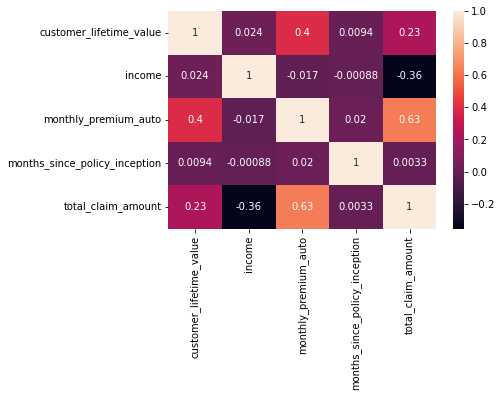

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()



Comments: There appears to be some positive correlation between monthly premium auto and total claim amount as well as customer lifetime value.

Furthermore, there is a weak negative correlation between income and total claim amount. 

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

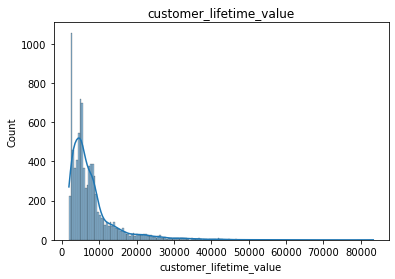

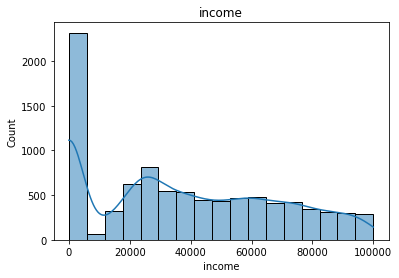

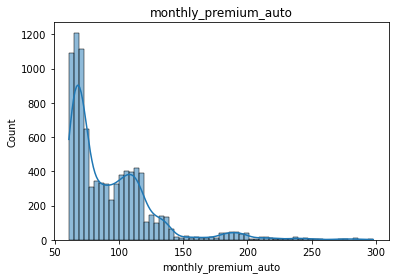

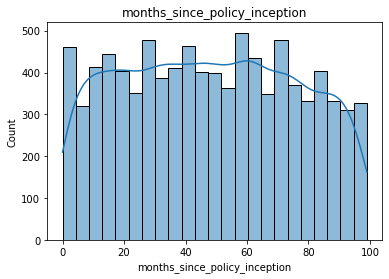

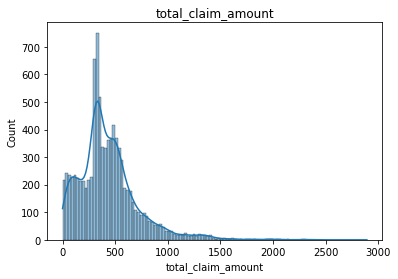

In [71]:
for col in continuous_df:
        plt.figure()
        plt.title(col)
        sns.histplot(data=continuous_df[col],kde=True)
        
        

Comment what you can see in the plots:

    
    -CLV, monthly premium auto and total claim amount is quite positively skewed
    
    -Uniform distribution for months since policy inception showing consistency in customers


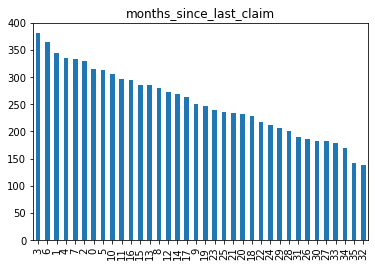

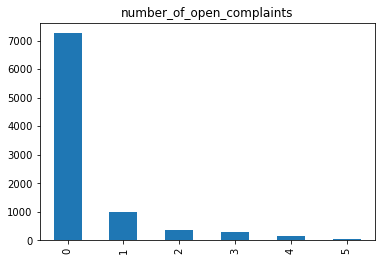

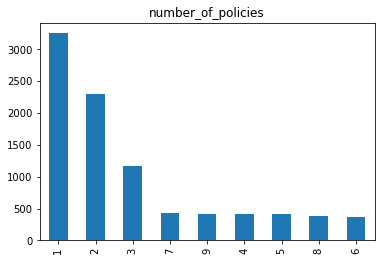

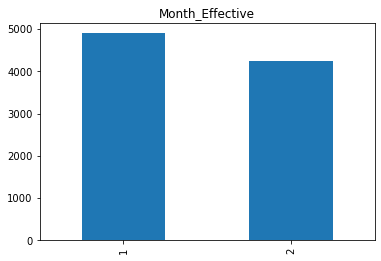

In [72]:
for col in discrete_df:
        plt.figure()
        plt.title(col)
        discrete_df[col].value_counts().plot(kind = 'bar')


Comment what you see in the plots:

    - Large positive skew in number of open complaints and policies.
    - Gender of insurance holders is quite evenly split.

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

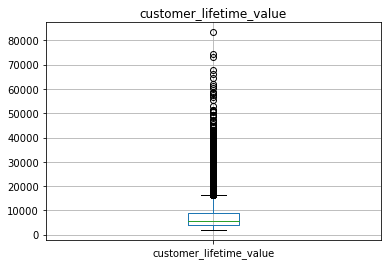

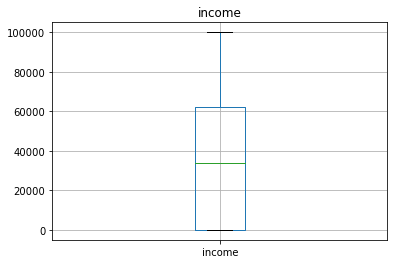

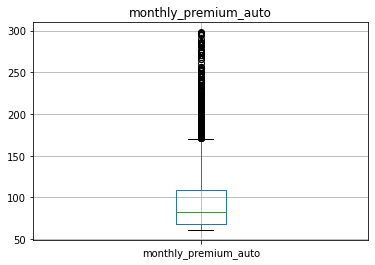

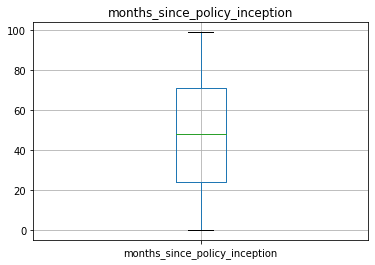

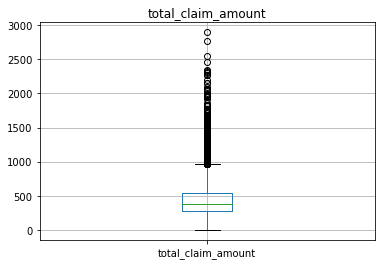

In [73]:
for col in continuous_df:
        plt.figure()
        plt.title(col)
        continuous_df.boxplot([col])

#Did you find outliers? Comment what you will do with them

    - There are outliers in Monthly Premium Auto, CLV and, Total Claim Amount
    - I plan to remove the outliers by setting a threshold for lower and upperbound and capturing only those values into the model.

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [74]:
customer_numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
Month_Effective                  0
dtype: int64

There are no NaN's in my numerical data 

### Cleaning Categorical Data

In [85]:
customer_categorical=customer_df.select_dtypes(exclude = np.number)
customer_categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Year_Effective
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011


In [86]:
customer_categorical.isna().sum()
#There are no NaN's in my categorical data

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
Year_Effective      0
dtype: int64

In [87]:

#drop customer as too many unique values and not explanatory
customer_categorical=customer_categorical.drop(['customer'], axis=1) 

In [88]:
#Check all unique values of columns.

for col in customer_categorical:
    print(customer_categorical[col].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']
[2011]
Categories (1, int64): [2011]


In [89]:
customer_categorical.dtypes #All object types make sense

state                 object
response              object
coverage              object
education             object
employmentstatus      object
gender                object
location_code         object
marital_status        object
policy_type           object
policy                object
renew_offer_type      object
sales_channel         object
vehicle_class         object
vehicle_size          object
Year_Effective      category
dtype: object

#Does any column contain alpha and numeric data? Decide how to clean it.

These each contain alpha (characters and numeric data)which can all be turned into categorical ordinal:
policy_type        - 
policy             
renew_offer_type  - remove Offer and label 1,2,3,4. Maintain as categorical but ordinal for encoding.

Ordinal:
coverage
education
policy type
policy 
renew offer type
vehicale class
vehicle size

In [90]:
customer_categorical['renew_offer_type']=customer_categorical['renew_offer_type'].str.replace("Offer","")

In [91]:
customer_categorical.head(20)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Year_Effective
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,Medsize,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,3,Agent,Four-Door Car,Medsize,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,Medsize,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,1,Call Center,SUV,Medsize,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,Medsize,2011
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,2,Web,Two-Door Car,Medsize,2011
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,Medsize,2011
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,Medsize,2011
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,Medsize,2011
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,2,Branch,Four-Door Car,Medsize,2011


Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Policy appears to combine policy type. Since they are all unique "Auto" type we can drop policy type to avoid multicollinearity. 

In [92]:
customer_categorical=customer_categorical.drop(['policy_type'], axis=1) 

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [37]:

# customer_categorical=categorical_cleaning(customer_categorical)
# else: return x for col in customer_categorical:

#Option 2 (same as above):
#categories = []
#for col in categoricals.columns:
#    categories.append(list(categoricals[col].unique()))

#I will add "Other" as a possibility for every column for successful encoding

#categories = [list(customer_categorical[col].unique())  for col in customer_categorical.columns]
#categories =


#def clean_categoricals(categorical_df, col):
 #   if x not in list(categorical_df[col].unique()): 
  #      return 'other'
   # else:
    #    return x
    

#for x in customer_categorical.columns:
   # if x not in list(customer_categorical['col'].unique()): 
 #       return "other"
 #   else:
 #       return x


In [ ]:
customer_categorical.nunique()

### Feature Extraction

Plot all the categorical variables with the proper plot. What can you see?

Below I notice that some answers/classess are more represented than others. Hence, the model is likely to become better at predicting those values.

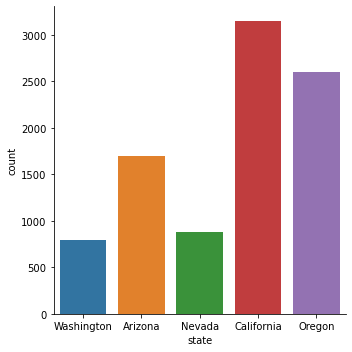

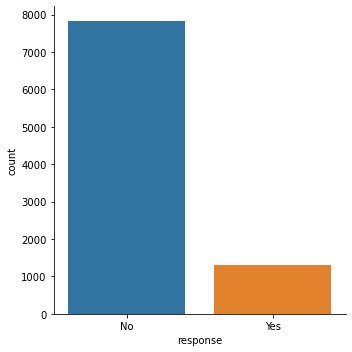

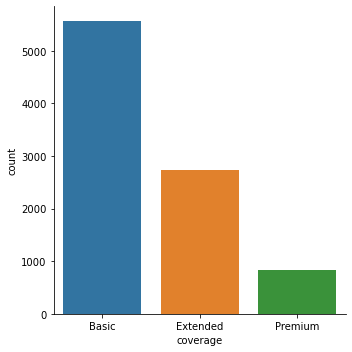

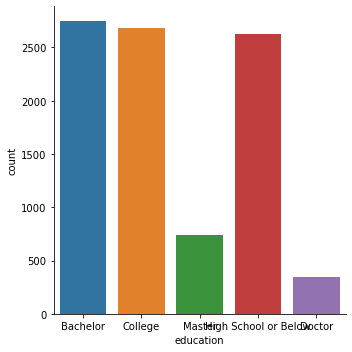

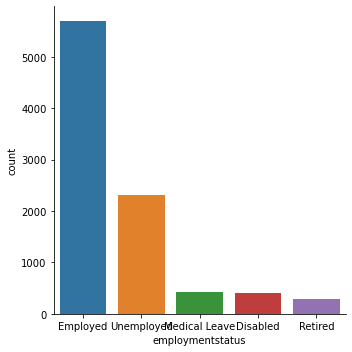

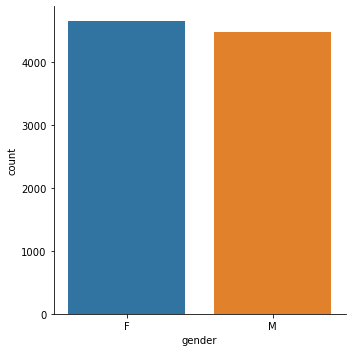

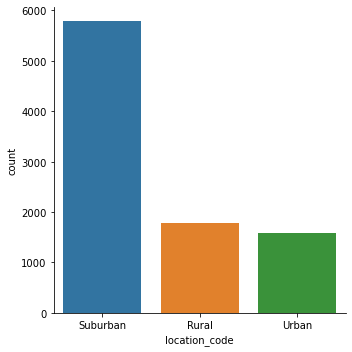

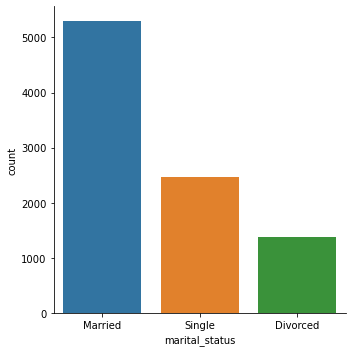

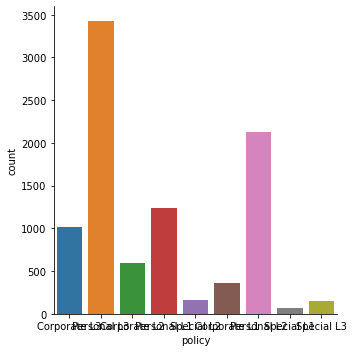

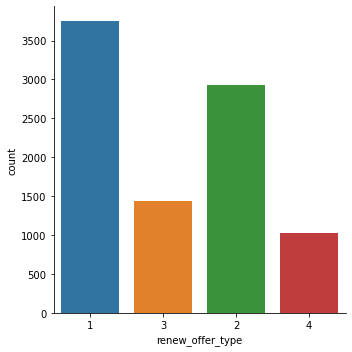

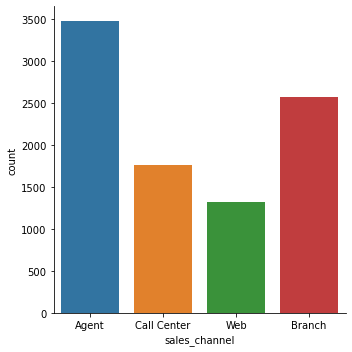

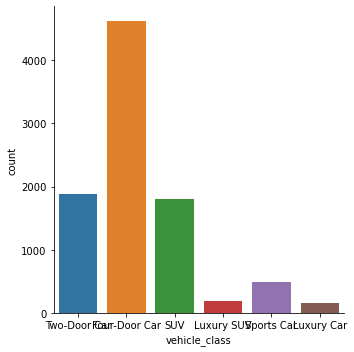

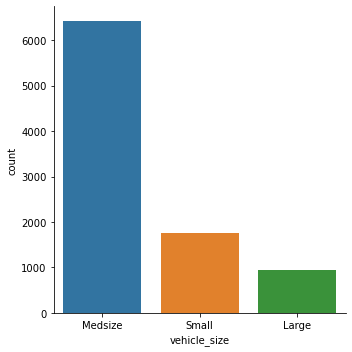

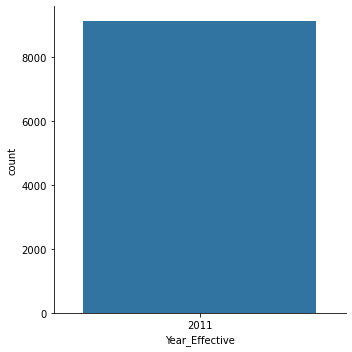

In [93]:
for column in customer_categorical.columns:
    sns.catplot(data= customer_categorical, x=column, kind='count')
    plt.show()

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Already dropped columns which i thought were invalid. All policies are from one year 2011 however, so drop this column.

In [94]:
customer_categorical=customer_categorical.drop(['Year_Effective'], axis=1) 

Plot time variable. Can you extract something from it?

In [ ]:
Unsure how to do this since decided to drop effective to date. Only have Month effective.